
# Краткое описание задачи    

Изучим из открытых источников данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Выясним определяющие успешность игры закономерности, для планирования успешной рекламной компании.


# Предобработка данных

In [321]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/games.csv')

In [322]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [324]:
df.columns = df.columns.str.lower()

Приводим все наименования стобцов к нижнему регистру

In [325]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [326]:
df['name'] = df['name'].str.lower()
df['genre'] = df['genre'].str.lower()
df['platform'] = df['platform'].str.lower()

Приводим все объекты в указанных ниже колонках к нижнему регистру

In [327]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [328]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [329]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


Смотрим пропущенные значения, в наименование отсутсвует 2 значения, скорее всего поэтому отсутсвует значения и в жанре. Удалим пустые значения в 'name' так как они занимают меньше 1% процентов от общего количества значений и заоодно проверим исчезнут ли пропуски в 'genre'

In [330]:
df = df.dropna(subset=['name'])

In [331]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [332]:
df = df.dropna(subset=['year_of_release'])

В столбце 'year_of_release' также отсутсвуют значениях, так как их количество меньше 2% на общий анализ данных их удаление не повлияет 

In [333]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [334]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [335]:
df['year_of_release'] = round(df['year_of_release'])

In [336]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')

In [337]:
df['year_of_release'] = pd.DatetimeIndex(df['year_of_release']).year

Приводим значения в 'year_of_release' к подобающему виду

In [338]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [339]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1         2
0.7       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [340]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [341]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [342]:
df['user_score'] = df['user_score'].astype('float')

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Заменим значение tbd на nan - так как аббревиатура используется, если какая-то информация еще не определена или решение по вопросу не принято и переведем user_score к типу float

In [344]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [345]:
df['rating'].isna().sum()

6676

Так как пустых значений в 'rating' слишком много, принимаем решения не удалять их, но и заменять их на медиану или среднее будет неправильно. Тоже самое можно применить и к 'critic_score', 'user_score'.
Также изучив информацию ассоциации ESRB было обраружено, что рейтинг 'K-A' использовался до 1997, а после был преобразован в рейтинг 'Е', в связи с чем заменим значения ниже.

In [346]:
df['rating'] = df['rating'].replace('K-A', 'E')

In [347]:
df['rating'] = df['rating'].fillna('unknown')

In [348]:
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Заменим значения nan на unknown, так как рейтинг ESRB распространяется только на Америку и Канаду, и в дальнейшем может быть не корректный анализ.


In [349]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


In [350]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [351]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [352]:
df.duplicated().sum()

0

Проверим также наличие дубликатов

# Анализ данных

<AxesSubplot:xlabel='year_of_release'>

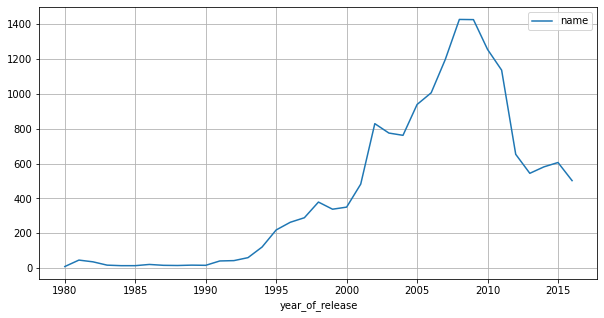

In [353]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid=True, figsize=(10,5))

<AxesSubplot:>

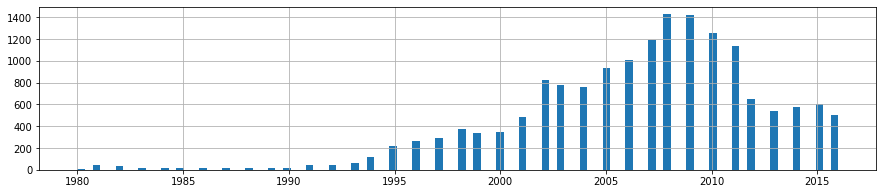

In [354]:
df['year_of_release'].hist(bins=100, figsize=(15,3))

In [355]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').sum()

name    16444
dtype: int64

In [356]:
df.query('year_of_release<1995').count()

name               486
platform           486
year_of_release    486
genre              486
na_sales           486
eu_sales           486
jp_sales           486
other_sales        486
critic_score         4
user_score           4
rating             486
total_sales        486
dtype: int64

Проанализировав данные о количестве проданных игр в период с 1980 по 2016 год можно заметить, что их количество с 1980-1995 намного меньше, чем в остальные годы. Сделаем срез и посчитаем долю в период с 1980-1995 к общему количеству в датафрейме, получаем около 3%, считаю что данные 3% можно исключить из дальнейшего анализа

In [357]:
df = df.query('year_of_release>=1995')

<AxesSubplot:xlabel='platform'>

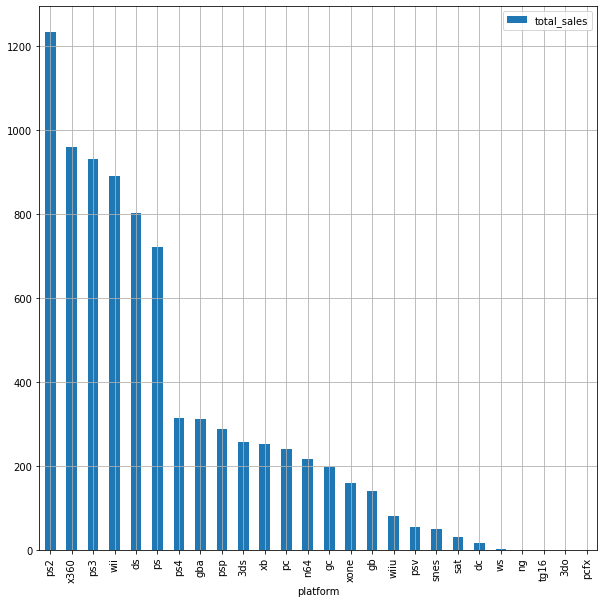

In [358]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)\
.plot(kind='bar', grid=True, figsize=(10,10))

График показывает лидеров по продажам - ps2, X360, ps3, wii, ds, ps. Построим распределение по годам для лидеров по продажам

<AxesSubplot:xlabel='year_of_release'>

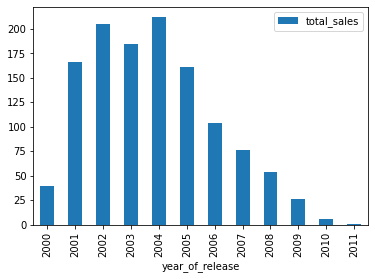

In [359]:
df.query('platform == "ps2"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

Максимальные продажи ps2 зафиксированы  в 2002 и 2004

<AxesSubplot:xlabel='year_of_release'>

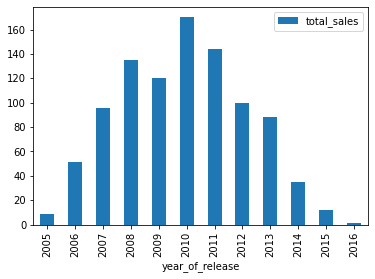

In [360]:
df.query('platform == "x360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')


Максимальные продажи x360 зафиксированы  в 2010 и 2011

<AxesSubplot:xlabel='year_of_release'>

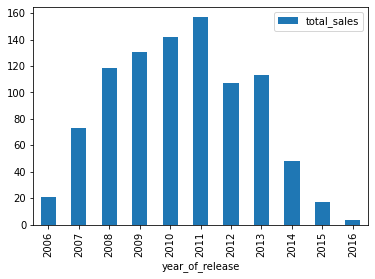

In [361]:
df.query('platform == "ps3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')


Максимальные продажи ps3 зафиксированы в 2010 и 2011

<AxesSubplot:xlabel='year_of_release'>

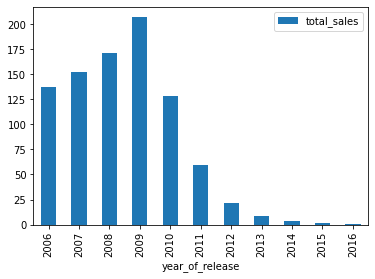

In [362]:
df.query('platform == "wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')


Максимальные продажи wii зафиксированы  в 2009 и 2008

<AxesSubplot:xlabel='year_of_release'>

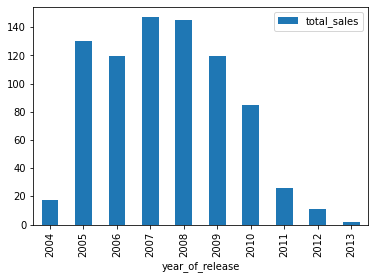

In [363]:
df.query('platform == "ds"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')


Максимальные продажи ds зафиксированы в 2007 и 2008

<AxesSubplot:xlabel='year_of_release'>

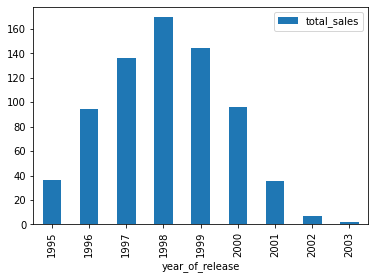

In [364]:
df.query('platform == "ps"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')


Максимальные продажи ps зафиксированы  в 1998 и 1999

Изучив все графики по лидерам продаж, можно заметить, что графики в целом похожи у всех идет примерно равномерный взлет по продажам, а затем равномерный спад (не считая платформу wii, у этой платформы был резкий скачек в положительную сторону, но затем через некоторое время последовал резкий скачек вниз). Также можно заметить, что средний срок жизни платформы около 10 лет.

Учитывая вышеизложенное, для дальнейшего анализа возьмем актуальный период 3 года.

In [365]:
actual_period = df.query('year_of_release >= 2014')

<AxesSubplot:xlabel='year_of_release'>

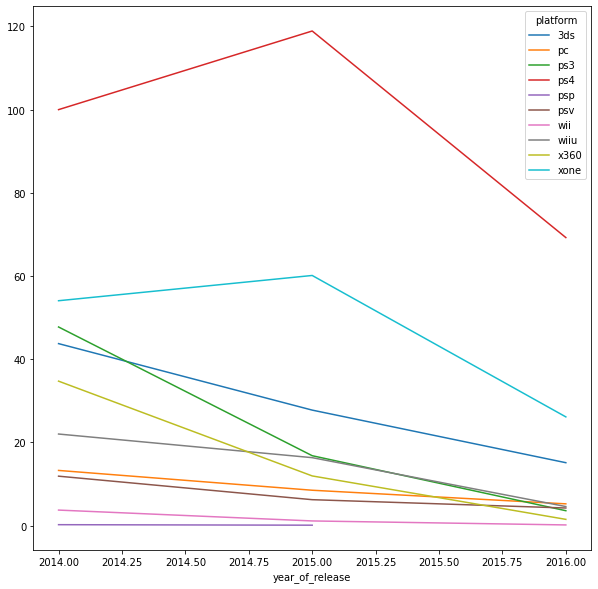

In [366]:
actual_period.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(figsize=(10,10))


In [367]:
actual_period.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

year_of_release,2014,2015,2016
platform,,,
3ds,43.76,27.78,15.14
pc,13.28,8.52,5.25
ps3,47.76,16.82,3.60
ps4,100.00,118.90,69.25
psp,0.24,0.12,NaN
psv,11.90,6.25,4.25
wii,3.75,1.14,0.18
wiiu,22.03,16.35,4.60
x360,34.74,11.96,1.52


Cудя по графику можно выбрать 3 потенциальных лидеров по продажам 3ds, ps4, xone, так как у остальных значения слишком приближены к 0 в 2016 году, однако можно заметить что продажи у них стремятся вниз.

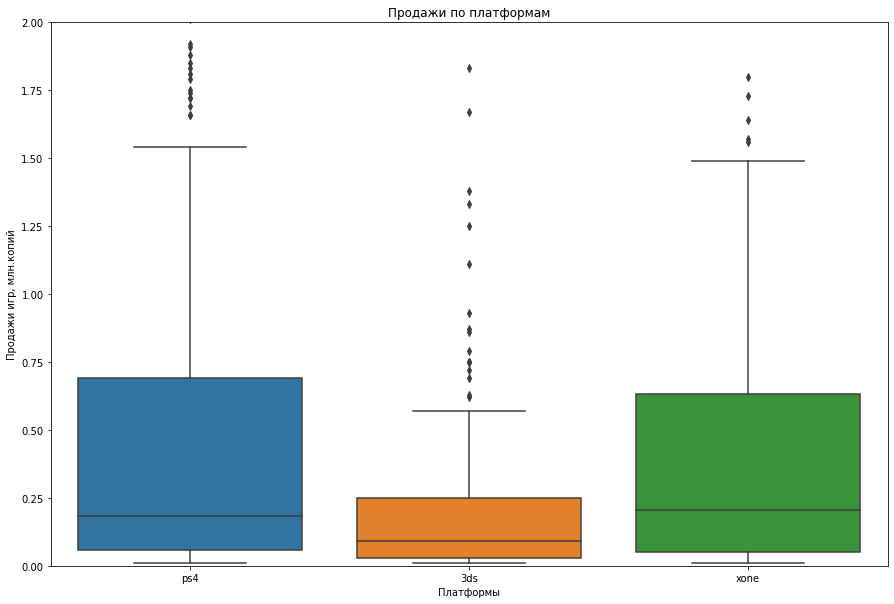

In [368]:
plt.figure(figsize=(15,10))
sns.boxplot(data=actual_period.query("platform in ['3ds', 'ps4', 'xone']"), x='platform', y='total_sales').\
    set(title='Продажи по платформам', xlabel='Платформы', ylabel='Продажи игр, млн.копий', ylim=(0,2))
plt.show()

Согласно данным графика из всех 3 платформ самая высокая по продажам согласно медиане - xone, далее ps4 и далее 3ds.

In [369]:
xone = actual_period.query('platform == "xone"')

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

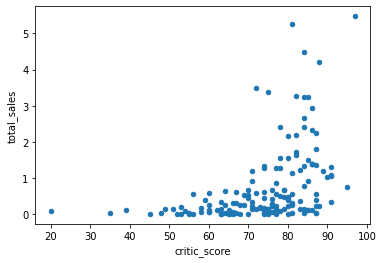

In [370]:
xone.plot(x='critic_score', y='total_sales', kind='scatter')

In [371]:
xone['total_sales'].corr(actual_period['critic_score'])

0.42867694370333226

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

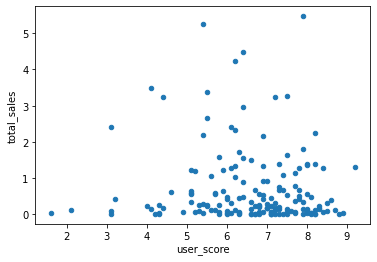

In [372]:
xone.plot(x='user_score', y='total_sales', kind='scatter')

In [373]:
xone['total_sales'].corr(actual_period['user_score'])

-0.0703839280647581

Построив диаграммы рассеяния и посчитав коэффициент корреляции можно заметить, что взаимосвязь между оценками пользователей и продажами практически нет, а взаимосвязь между оценками критиков и продажами намного больше (в 7 раз), хотя и не сильная, но связь прослеживается

In [374]:
three_ds = actual_period.query('platform == "3ds"')
ps4 = actual_period.query('platform == "ps4"')

In [375]:
three_ds['total_sales'].corr(actual_period['critic_score'])

0.31411749286905105

In [376]:
three_ds['total_sales'].corr(actual_period['user_score'])

0.2151932718527028

In [377]:
ps4['total_sales'].corr(actual_period['critic_score'])

0.40266141068104083

In [378]:
ps4['total_sales'].corr(actual_period['user_score'])

-0.040131589472697356

Похожую ситуацию можно заметить и у платформы ps4, однако у платформы 3ds зависимоть от оценок пользователей явно больше 

Посмотрим с чем связана такая зависимость у 3ds

In [379]:
three_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 47 to 16677
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             212 non-null    object 
 1   platform         212 non-null    object 
 2   year_of_release  212 non-null    int64  
 3   genre            212 non-null    object 
 4   na_sales         212 non-null    float64
 5   eu_sales         212 non-null    float64
 6   jp_sales         212 non-null    float64
 7   other_sales      212 non-null    float64
 8   critic_score     51 non-null     float64
 9   user_score       55 non-null     float64
 10  rating           212 non-null    object 
 11  total_sales      212 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 29.6+ KB


In [380]:
171/512

0.333984375

In [381]:
xone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             228 non-null    object 
 1   platform         228 non-null    object 
 2   year_of_release  228 non-null    int64  
 3   genre            228 non-null    object 
 4   na_sales         228 non-null    float64
 5   eu_sales         228 non-null    float64
 6   jp_sales         228 non-null    float64
 7   other_sales      228 non-null    float64
 8   critic_score     155 non-null    float64
 9   user_score       165 non-null    float64
 10  rating           228 non-null    object 
 11  total_sales      228 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 31.3+ KB


In [382]:
182/247

0.7368421052631579

In [383]:
ps4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             376 non-null    object 
 1   platform         376 non-null    object 
 2   year_of_release  376 non-null    int64  
 3   genre            376 non-null    object 
 4   na_sales         376 non-null    float64
 5   eu_sales         376 non-null    float64
 6   jp_sales         376 non-null    float64
 7   other_sales      376 non-null    float64
 8   critic_score     237 non-null    float64
 9   user_score       242 non-null    float64
 10  rating           376 non-null    object 
 11  total_sales      376 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 46.3+ KB


In [384]:
257/392

0.6556122448979592

После подсчета доли отзывов пользователей к количеству игр можно заметить, что только у 3ds она составляет менее 50%, так как в данных много пропусков, в связи с чем считаю, что нельзя принимать корреляцию 3ds, которую делали ранее за истину

In [385]:
actual_period.pivot_table(index='genre', values = 'total_sales', aggfunc='sum').sort_values(by ='total_sales',ascending=False)


,total_sales
genre,
action,199.36
shooter,170.94
sports,109.48
role-playing,101.44
misc,37.55
fighting,28.22
racing,27.52
platform,18.09
adventure,17.55


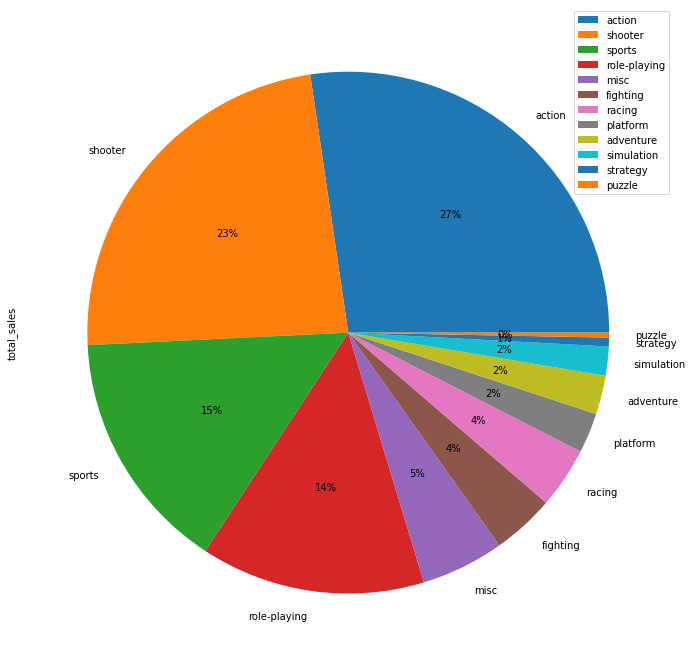

In [386]:
actual_period.pivot_table(index='genre', values = 'total_sales', aggfunc='sum')\
.sort_values(by ='total_sales',ascending=False)\
.plot(kind='pie', y= 'total_sales', figsize=(12,12), autopct='%1.0f%%');


Изучив информацию по продажам игр относительно жанров можно заметить, что самый популярным является жанр action, самые низкие продажи показывает жанр strategy (более чем в 15 раз ниже) 

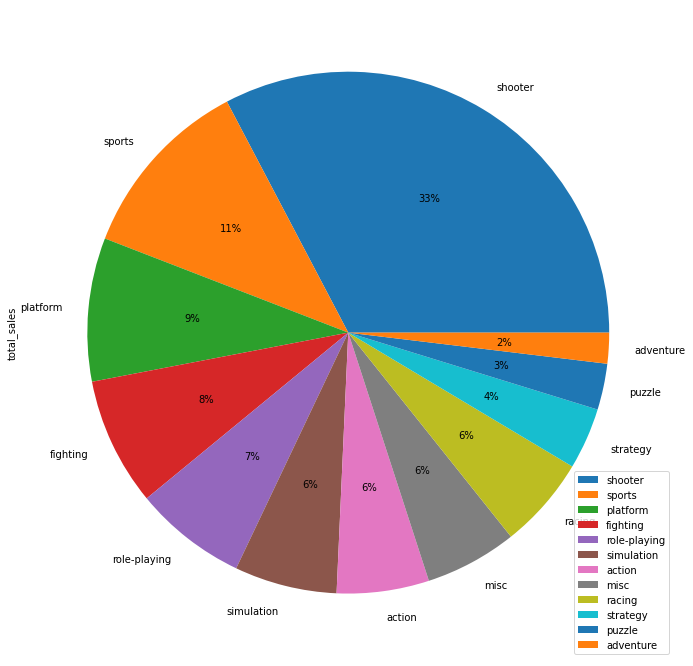

In [387]:
actual_period.pivot_table(index='genre', values = 'total_sales', aggfunc='median')\
.sort_values(by ='total_sales',ascending=False)\
.plot(kind='pie', y= 'total_sales', figsize=(12,12), autopct='%1.0f%%');

Изучив диаграмму по медианным значениям общих продаж, можно заметить, что более стабильные продажи приносит жанр shooter, а самые низкие продажи у жанра advanture.

# Шаг 4 портрет пользователя каждого региона

Проанилизируем продажи в разных регионах по платформам и выведем топ 5

<AxesSubplot:xlabel='platform'>

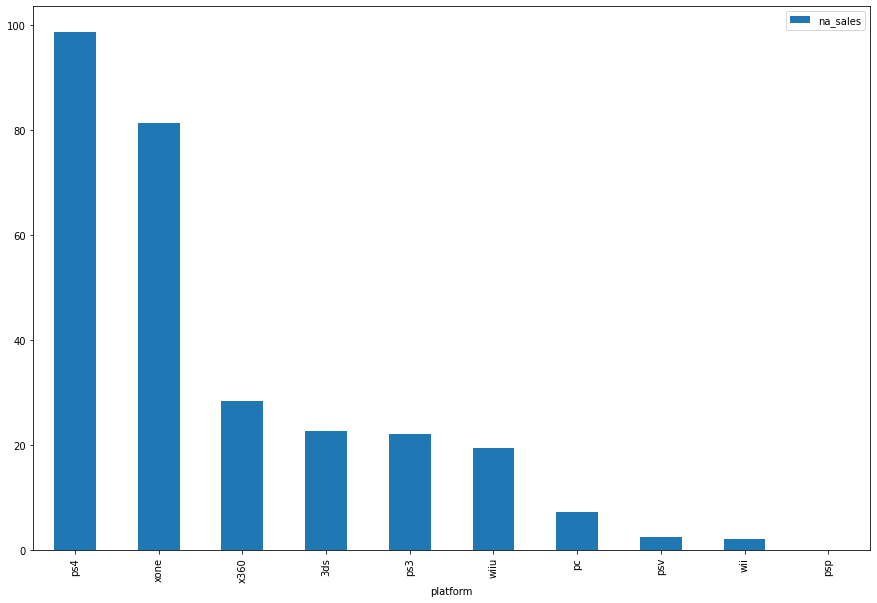

In [388]:
actual_period.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)\
.plot(kind='bar', figsize=(15,10))

<AxesSubplot:xlabel='platform'>

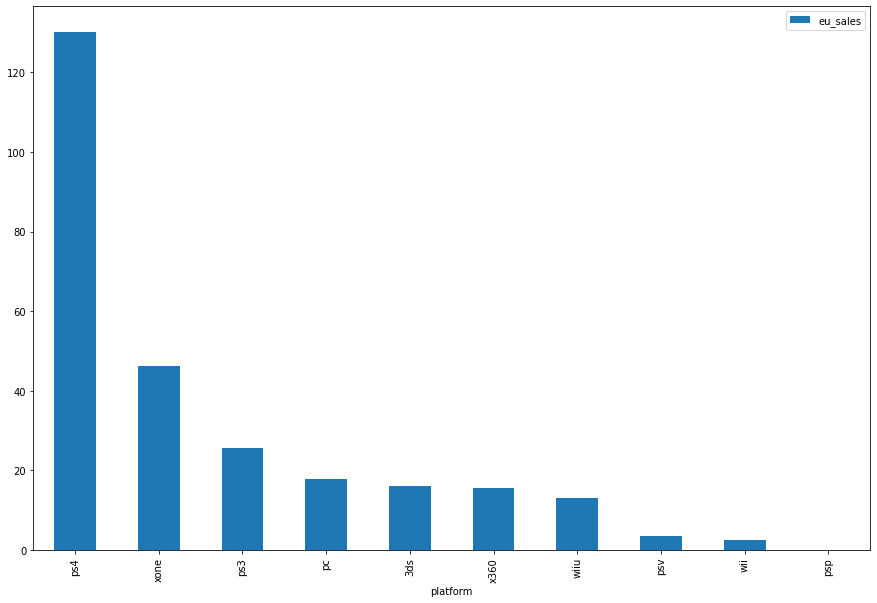

In [389]:
actual_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)\
.plot(kind='bar', figsize=(15,10))

<AxesSubplot:xlabel='platform'>

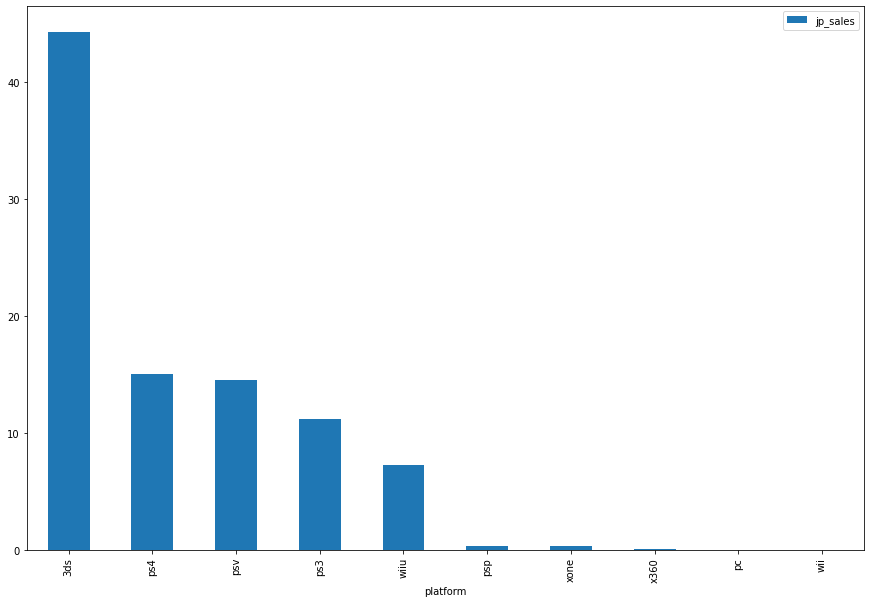

In [390]:
actual_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)\
.plot(kind='bar', figsize=(15,10))

Рассмотрим различия 5 полпулярных платформ в долях продаж

In [391]:
percent_na = actual_period.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)



In [392]:
percent_na['na_%'] = round(percent_na['na_sales']*100/(percent_na['na_sales'].sum()))


In [393]:
percent_na.head()

,na_sales,na_%
platform,,
ps4,98.61,35.0
xone,81.27,29.0
x360,28.30,10.0
3ds,22.64,8.0
ps3,22.05,8.0


In [394]:
percent_eu = actual_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)

In [395]:
percent_eu['eu_%'] = round(percent_eu['eu_sales']*100/(percent_eu['eu_sales'].sum()))

In [396]:
percent_eu.head()

,eu_sales,eu_%
platform,,
ps4,130.04,48.0
xone,46.25,17.0
ps3,25.54,9.0
pc,17.97,7.0
3ds,16.12,6.0


In [397]:
percent_jp = actual_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)

In [398]:
percent_jp['jp_%'] = round(percent_jp['jp_sales']*100/(percent_jp['jp_sales'].sum()))

In [399]:
percent_jp.head()

,jp_sales,jp_%
platform,,
3ds,44.24,48.0
ps4,15.02,16.0
psv,14.54,16.0
ps3,11.22,12.0
wiiu,7.31,8.0


Визуализируем полученные результаты

<AxesSubplot:ylabel='jp_%'>

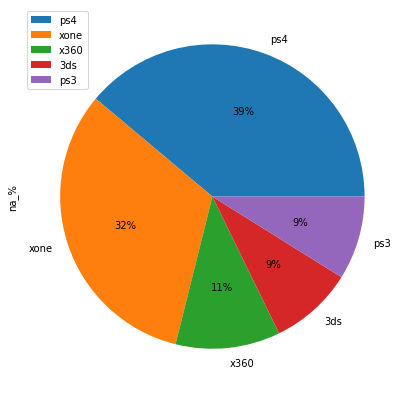

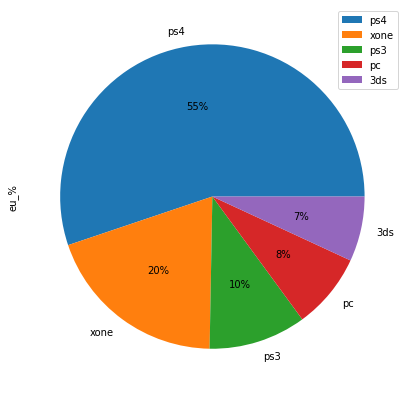

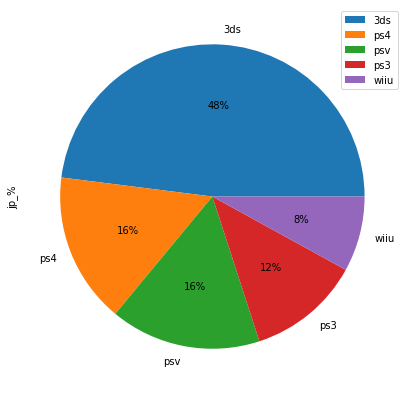

In [400]:
percent_na.head().plot(kind='pie', y='na_%', figsize=(7,7), autopct='%1.0f%%')
percent_eu.head().plot(kind='pie', y='eu_%', figsize=(7,7), autopct='%1.0f%%')
percent_jp.head().plot(kind='pie', y='jp_%', figsize=(7,7), autopct='%1.0f%%')

По выбранному периоду можно заметить, что в Америке и Европе самой популярной платформой является ps4, а в Японии 3ds.

Изучим топ 5 самых популярных жанров в регионах

In [401]:
actual_period.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()

,na_sales
genre,
shooter,79.02
action,72.53
sports,46.13
role-playing,33.47
misc,15.05


In [402]:
actual_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()

,eu_sales
genre,
action,74.68
shooter,65.52
sports,45.73
role-playing,28.17
racing,14.13


In [403]:
actual_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

,jp_sales
genre,
role-playing,31.16
action,29.58
fighting,6.37
misc,5.61
shooter,4.87


Изучив данные можно заметить, что в Америке и Европе предпочтения по жанрам сходятся - action и shooter (в основном это командные игры, в которые можно играть компанией, как дома, так и в различных заведениях), однако в Японии преобладает жанр role-playing (в своей основной массе это одиночные игры) предположительно это связано с жизнеными устоями и культурой жителей Японии, еще в 1990 годы появился термин "хикикомори"(нахождение в уединении) и насчитывал около 1 млн. людей, как в подростковом возрасте, так и в возрасте 30-40 лет.

Посмотрим, как влияет рейтинг на продажи в разных регионах

In [404]:
actual_period.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
unknown,58.95,56.90,64.72


Изучив данные можно заметить, что рейтинг (например Е) сильно влияет на продажи в разных регионах.
Также можно заметить, что почти во всех рейтингах по продажам лидирует Америка (и это не удивительно, если посмотрим в открытых источниках финансовые итоги игровой индустрии различных годов, то можно заметить, лидирующую строчку делят между собой Америка и Китай)

# Проверка гипотез

Проверим гипотезу - средние пользовательские рейтинги платформ xone и pc одинаковые

H0: Средние пользовательские рейтинги платформ xone и pc одинаковые

H1: Средние пользовательские рейтинги платформ xone и pc разные

In [405]:
xone = actual_period.query('platform == "xone" and user_score > 0')

In [406]:
xone = xone['user_score']

In [407]:
pc = actual_period.query('platform == "pc" and user_score > 0')

In [408]:
pc = pc['user_score']

In [409]:
from scipy import stats as st
alpha = 0.05 
results = st.ttest_ind(xone, pc, equal_var = False)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Проверим гипотезу - средние пользовательские рейтинги жанров action и sports разные

H0: Средние пользовательские рейтинги платформ action и sports одинаковые

H1: Средние пользовательские рейтинги платформ action и sports разные

In [410]:
action = actual_period.query('genre == "action" and user_score > 0')

In [411]:
action = action['user_score']

In [412]:
sports = actual_period.query('genre == "sports" and user_score > 0')

In [413]:
sports = sports['user_score']

In [414]:
from scipy import stats as st
alpha = 0.05 
results = st.ttest_ind(action, sports, equal_var = False)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.1825550382644557e-14
Отвергаем нулевую гипотезу


# Общий вывод

В ходе анализа данных была проведена предобработка данных: удалены или заменены нулевые значения (количество таких объектов в датафрейме не превышала 3%), наименования стобцов и объектов датафрейма приведены к общему формату, были обнаружены и исправлены значения устаревших рейтингов, проведена проверка датафрейма на дубликаты.
Проведен анализ данных датафрейма после его преобразования: в 2008-2009 годах количество платформ было максимальным, рекордсмены по продажам за период 2014-2016 являются - ps4, xone, 3ds обнаружено что средний срок жизни платформы около 10 лет. Была обнаружена взаимосвязь между оценками критиков и продажами. Самые продаваемые игры с жанрами sports, shooter, platform. Было обнаружено, что в разных региона различные предпочтения по платформам: так в Америке и Европе - это ps4, xone; в Японии - это 3ds, ps4. Также обнаружено, что в разных региона разные предпочтения по жанрам, так в Америке и Европе они схожи (action и shooter), но в Японии они отличаются в силу культурных различий (role-playing и action). На продажи игр сильно влияет рейтинг, причем в разных регионах по разному (обозначим лидеров по продажам в зависимости от рейтинга и региона): Е - Америка, Е10+ - Америка, М - Америка, Т - Америка, unknown - Америка (основными покупателями игр и консолей является Америка), а самые большие продажи вне зависимости от региона занимают игры с рейтингом - М, unknown, E. 

Учитывая изложенное рекомендуемый план рекламного бюджета:
    
1) платформы ps4 и xone (в случае выбора одной платформа - ps4)
    
2) жанр shooter и action (в случае выбора одного жанра - shooter)

3) рейтинг ESRB М и без учета рейтинга ESRB (в случае выбора одного рейтинга - M)
    
4) регион размещения рекламы Америка и Европа (в случае выбора одного региона Америка)
    
5) также стоит обращать внимание на отзывы критиков 
